# Интерактивная заметка про спектр сигналов

**Спектр сигнала** — коэффициенты разложения сигнала в базисе ортогональных функций (обычно _sin_ и _cos_). Коэффициенты могут быть получены при помощи преобразования Фурье - переход из временной в частотную область.

Общие замечания по графикам:
* построенные спектры являются модулем от результата преобразования Фурье;
* побочные маленькие лепестки появились в следствие недостаточно большой частоты сэмплирования `N_SAMP_PER_PERIOD`. При увеличении этого значения лепестки будут также уменьшаться.
* графики отнормированы для удобства.

Отмечу, что потенциально возможно управлять графиками при помощи констант, описанных заглавными буквами. Надеюсь, ничего не сломается.

## Спектр однотонального сигнала

Ниже представлен однотональный сигнал - обычная синусоида - и его спектр, полученный при помощи преобразования Фурье. Обращаю внимание на следующее:
* номер максимального коэффициента совпадает с частотой сигнала `F`.

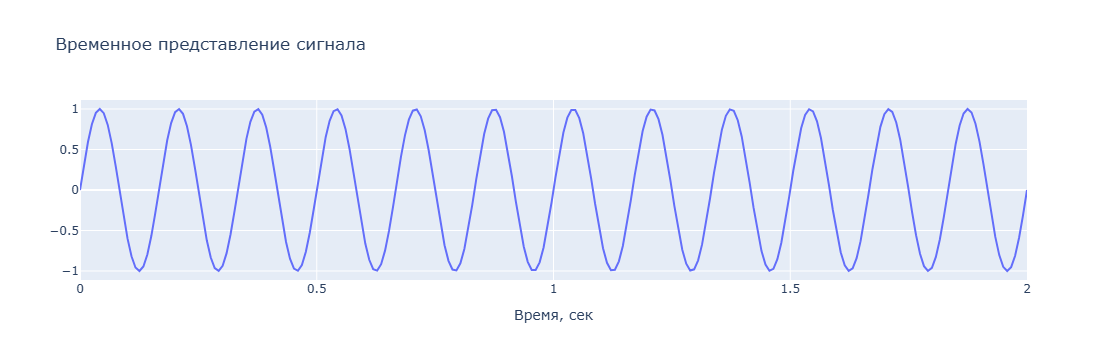

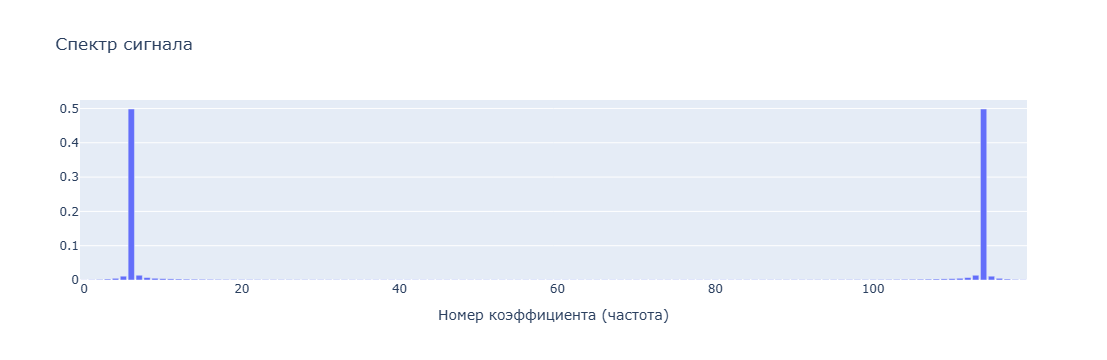

In [38]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Константы для управления
T_DUR = 2  # Длительность, сек
F = 6  # Частота, Гц
N_SAMP_PER_PERIOD = 20  # Количество сэмплов на один период сигнала

f_samp = N_SAMP_PER_PERIOD * F

x = np.linspace(0, T_DUR, T_DUR * f_samp)
y = np.sin(F * x * 2 * np.pi)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y)],
    layout_title_text="Временное представление сигнала",
    layout_xaxis_title="Время, сек",
)
iplot(fig)
fig = go.Figure(
    data=[go.Bar(y=np.abs(np.fft.fft(y, n=f_samp, norm="forward")))],
    layout_title_text="Спектр сигнала",
    layout_xaxis_title="Номер коэффициента (частота)",
)
iplot(fig)

## Сумма двух однотональных сигналов

Ниже представлен представлен сигнал, являющий суммой двух тонов, где частота второго тона в два раза больше частоты первого. Обращаю внимание на следующее:
* номера коэффициентов на графике спектра совпадают с частотами сигналов;
* на спектре сохраняется отношение амплитуд тонов.

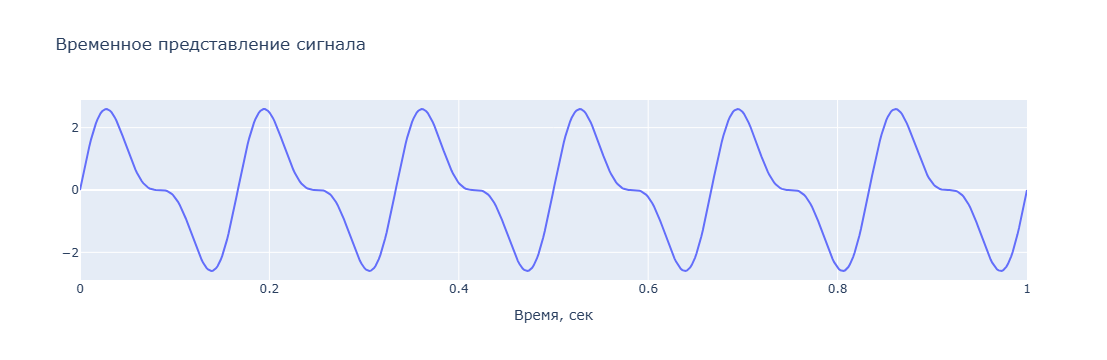

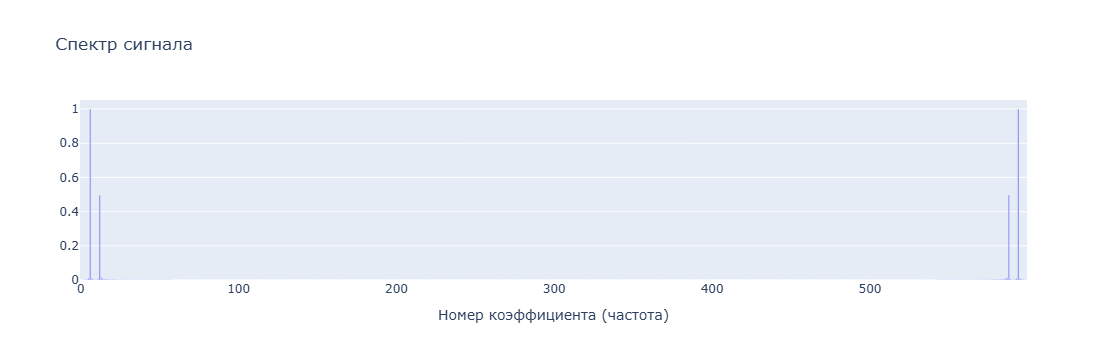

In [39]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Константы для управления
T_DUR = 1  # Длительность, сек
F = 6  # Частота, Гц
N_SAMP_PER_PERIOD = 100  # Количество сэмплов на один период сигнала
FIRST_AMP = 2  # Амплитуда первого сигнала
SECOND_AMP = 1  # Амплитуда второго сигнала

f_samp = N_SAMP_PER_PERIOD * F

x = np.linspace(0, T_DUR, T_DUR * f_samp)
y = FIRST_AMP * np.sin(F * x * 2 * np.pi)
y = y + SECOND_AMP * np.sin(2 * F * x * 2 * np.pi)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y)],
    layout_title_text="Временное представление сигнала",
    layout_xaxis_title="Время, сек",
)
iplot(fig)
fig = go.Figure(
    data=[go.Bar(y=np.abs(np.fft.fft(y, n=f_samp, norm="forward")))],
    layout_title_text="Спектр сигнала",
    layout_xaxis_title="Номер коэффициента (частота)",
)
iplot(fig)

## Дельта-функция на минималках

Попытка построить [дельта-функцию](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BB%D1%8C%D1%82%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) как набор синусоид. Спектр дельта функции является бесконечной гребенкой со всеми частотами. На картинке показан "укороченный" вариант. Отмечу, что по умолчанию график приближен, поэтому зеркальная часть спектра не видна, но она есть.

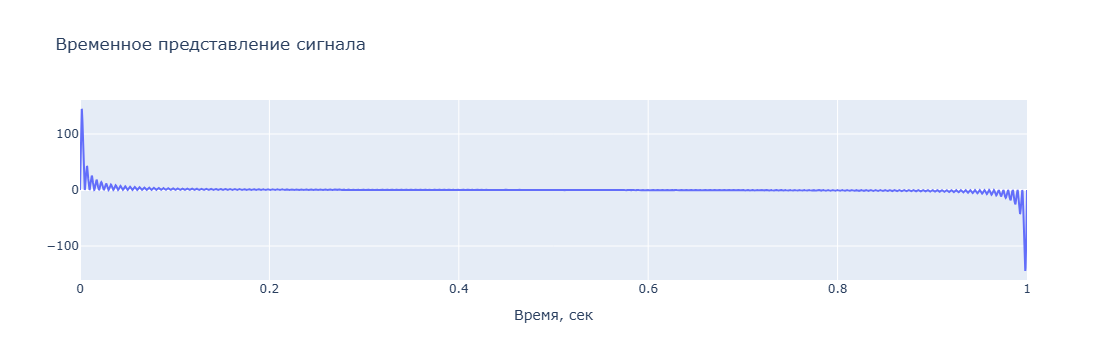

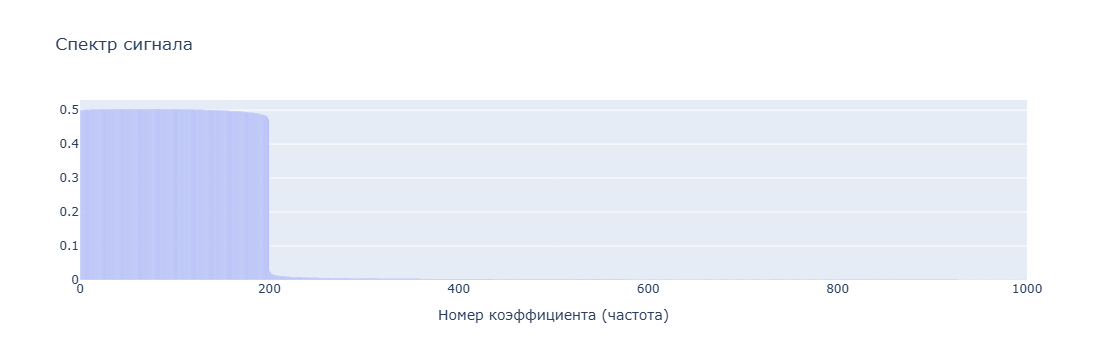

In [40]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Константы для управления
T_DUR = 1  # Длительность, сек
F = 1  # Частота, Гц
N_TONES = 200  # Количество синусоид
N_SAMP_PER_PERIOD = 100  # Количество сэмплов на один период сигнала

f_samp = N_SAMP_PER_PERIOD * N_TONES * F

x = np.linspace(0, T_DUR, T_DUR * f_samp)
y = np.sin(F * x * 2 * np.pi)
for i in range(2, 200):
    y = y + np.sin(i * F * x * 2 * np.pi)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y)],
    layout_title_text="Временное представление сигнала",
    layout_xaxis_title="Время, сек",
)
iplot(fig)
fig = go.Figure(
    data=[go.Bar(y=np.abs(np.fft.fft(y, n=f_samp, norm="forward")))],
    layout_title_text="Спектр сигнала",
    layout_xaxis_title="Номер коэффициента (частота)",
    layout=go.Layout(xaxis=dict(range=[0, 1000])),
)
iplot(fig)

## Амплитудная модуляция

Ниже представлен график амплитудно-модулированного сигнала. Отмечу, что по умолчанию график приближен, поэтому зеркальная часть спектра не видна, но она есть.

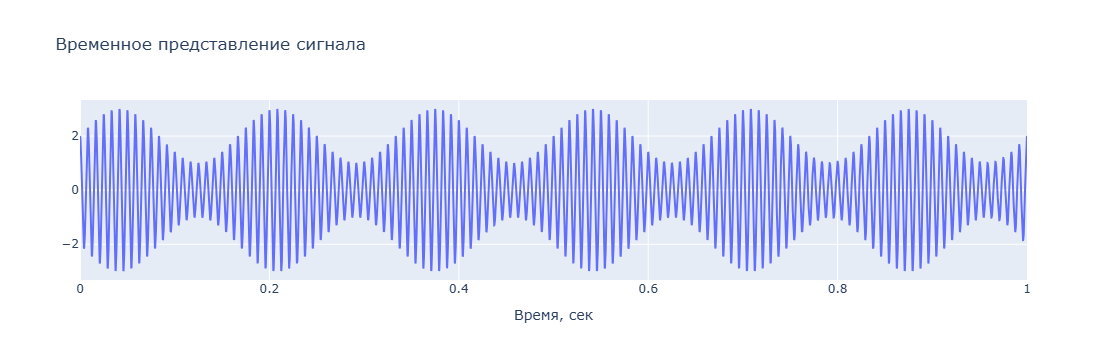

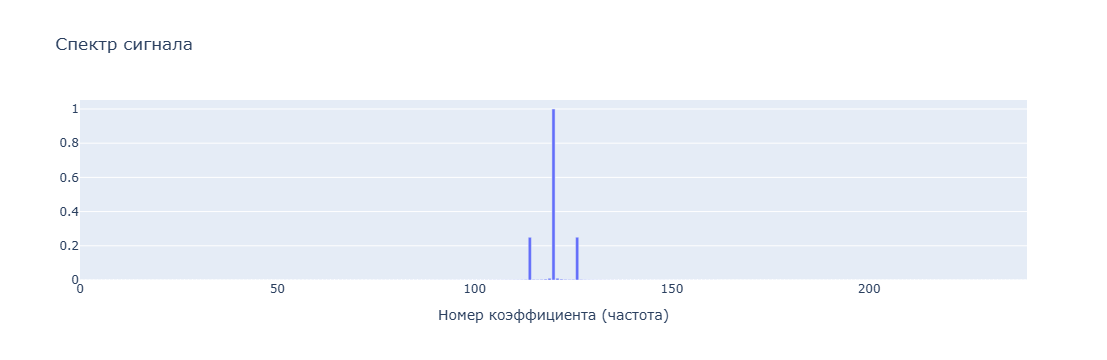

In [41]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Константы для управления
T_DUR = 1  # Длительность, сек
F = 6  # Частота информационного сигнала, Гц
F_AM = 20 * F  # Частота несущей, Гц
N_SAMP_PER_PERIOD = 100  # Количество сэмплов на один период сигнала

f_samp = N_SAMP_PER_PERIOD * F_AM

x = np.linspace(0, T_DUR, T_DUR * f_samp)
y = np.sin(F * x * 2 * np.pi) + 2
y = y * np.cos(F_AM * x * 2 * np.pi)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y)],
    layout_title_text="Временное представление сигнала",
    layout_xaxis_title="Время, сек",
)
iplot(fig)
fig = go.Figure(
    data=[go.Bar(y=np.abs(np.fft.fft(y, n=f_samp, norm="forward")))],
    layout_title_text="Спектр сигнала",
    layout_xaxis_title="Номер коэффициента (частота)",
    layout=go.Layout(xaxis=dict(range=[0, 2 * F_AM])),
)
iplot(fig)

## Линейно-частотная модуляция

Ниже представлен ЛЧМ сигнал и его спектр. Ожидается, что сигнал будет содержать все частоты от `F_START` до `F_END`. Отмечу, что по умолчанию график приближен, поэтому зеркальная часть спектра не видна, но она есть.

TODO: Лучше сравнить с `chirp` из `scipy`.

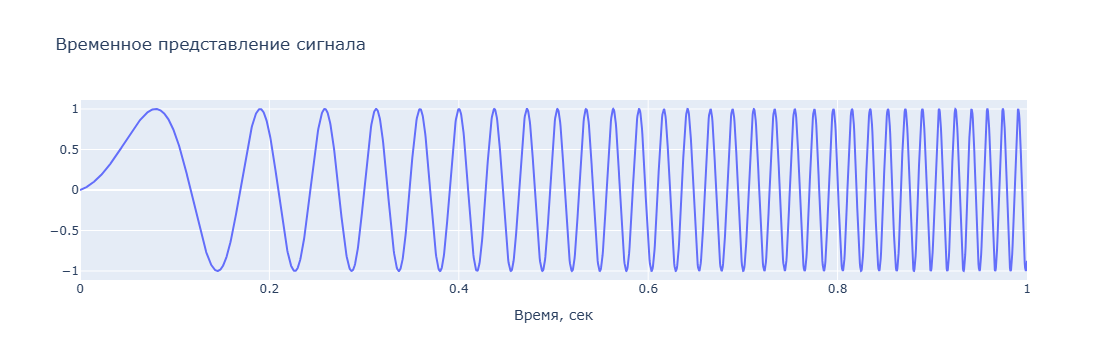

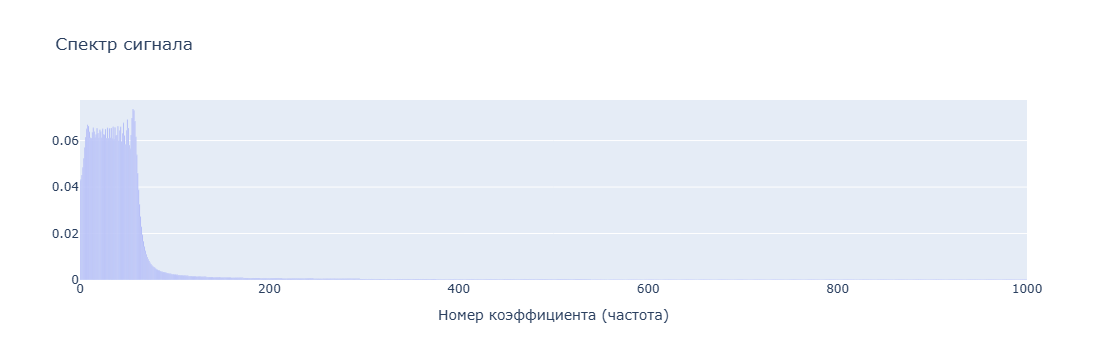

In [42]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Константы для управления
T_DUR = 1  # Длительность, сек
N_SAMP_PER_PERIOD = 50  # Количество сэмплов на один период сигнала
F_START = 1  # Начальная частота, Гц
F_END = 50  # Конечная частота, Гц

f_samp = N_SAMP_PER_PERIOD * F_END

x = np.linspace(0, T_DUR, T_DUR * f_samp)
chirp = np.linspace(F_START / (np.pi / 2), F_END / (np.pi / 2), len(x))
y = np.sin(chirp * x * 2 * np.pi)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y)],
    layout_title_text="Временное представление сигнала",
    layout_xaxis_title="Время, сек",
)
iplot(fig)
fig = go.Figure(
    data=[go.Bar(y=np.abs(np.fft.fft(y, n=f_samp, norm="forward")))],
    layout_title_text="Спектр сигнала",
    layout_xaxis_title="Номер коэффициента (частота)",
    layout=go.Layout(xaxis=dict(range=[0, 1000])),
)
iplot(fig)